In [1]:
from vedo import dataurl, Mesh, Sphere, show

import numpy as np
import math as mth
import os

In [2]:
# Reads the mesh data (.ply file) from a given URL location
filename = "./spider.ply"
if not os.path.isfile(filename): 
    !wget https://vedo.embl.es/examples/data/spider.ply

spider = Mesh("./spider.ply")

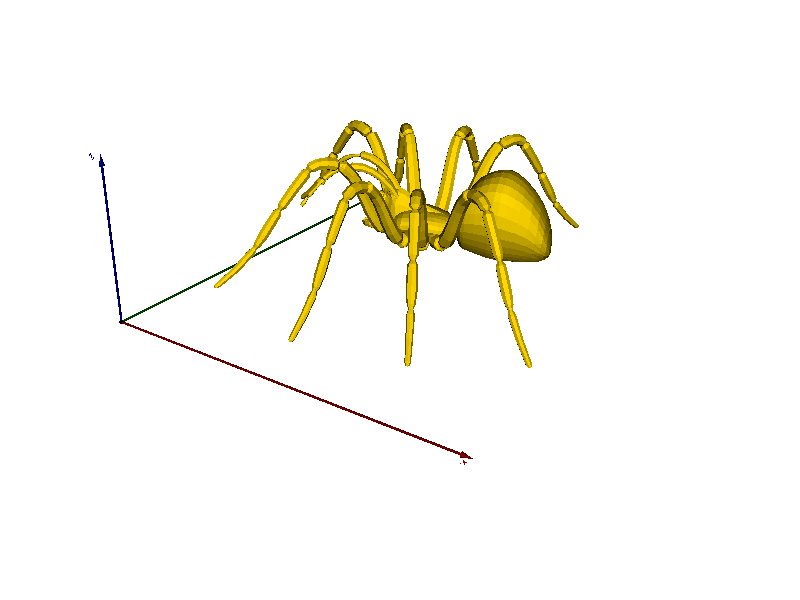

In [3]:
# Display spider with z-axis up 
show(spider, axes=2, viewup="z")#.close()

In [4]:
# Get the numpy array containing the coordinates 
# of the vertices
pts = spider.vertices

In [5]:
# Check the shape to ensure the dimensions will be correct when 
# performing matrix multiplication (transformations)
pts.shape

(4670, 3)

In [6]:
# We want a 3xN matrix so transpose matrix of points to be 3xN
pts = pts.transpose()

In [7]:
# Non Uniform Scaling transformation
S = np.array(
    [[2.0, 0.0, 0.0], 
     [0.0, 0.5, 0.0],
     [0.0, 0.0, 1.0]])

In [8]:
# Apply the transformation (matrix multiplication). We could also use @
pts1 = S @ pts
print(pts1)

[[3.61139989 3.62899995 3.64660001 ... 3.15280008 3.06340003 3.00099993]
 [1.01719999 1.02030003 1.0108     ... 1.4461     1.43990004 1.43859994]
 [1.61539996 1.58109999 1.61049998 ... 1.69920003 1.65260005 1.61049998]]



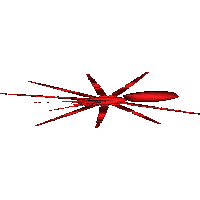

In [20]:
# Make a copy of the original shape
spider1 = spider.clone()

# Set the vertices of the new (transformed) shape
spider1.vertices = pts1.transpose()

# Change the color to red
spider1.c("red")

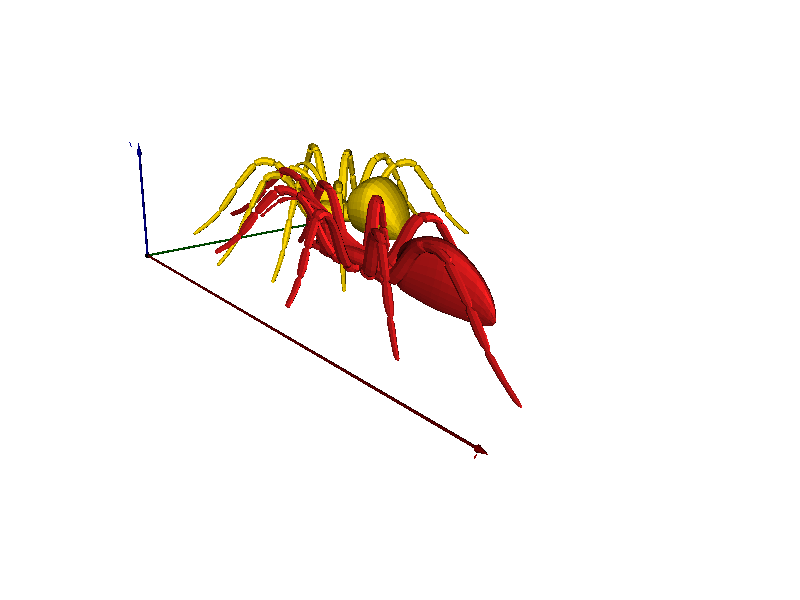

In [85]:
show(spider,spider1, axes=2, viewup="z", title="Non-uniform scaling")#.close()

## Apply 3D translation

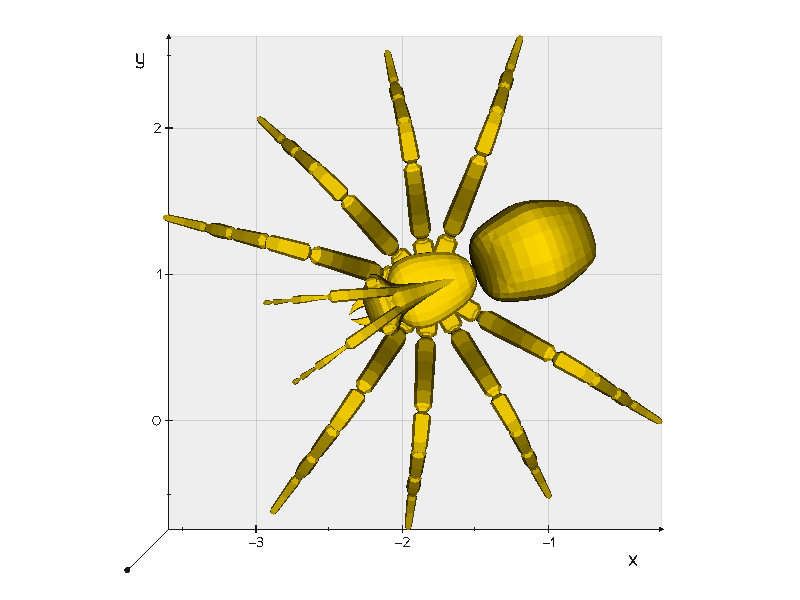

In [101]:
import numpy as np
from vedo import Mesh, show

# Load your mesh
spider_mesh = Mesh('./spider.ply')

# Given center of mass
com_x, com_y, com_z = 6.40, 1.52, 1.57

# Translate mesh to center at origin
tx, ty, tz = -com_x, -com_y, -com_z

# Assuming the mesh vertices are accessible as a Nx3 numpy array
vertices = np.array(spider_mesh.points())
# Apply translation
translated_vertices = vertices + np.array([tx, ty, tz])

# Calculate the scaling factor based on the desired size and current size
desired_size = 1.0 
current_size = 1.709  
scaling_factor = desired_size / current_size

# Apply uniform scaling
scaled_vertices = translated_vertices * scaling_factor

# Update mesh with transformed vertices
spider_mesh.points(scaled_vertices)

# Display the transformed mesh
show(spider_mesh, axes=True)

## Rotation & Scaling

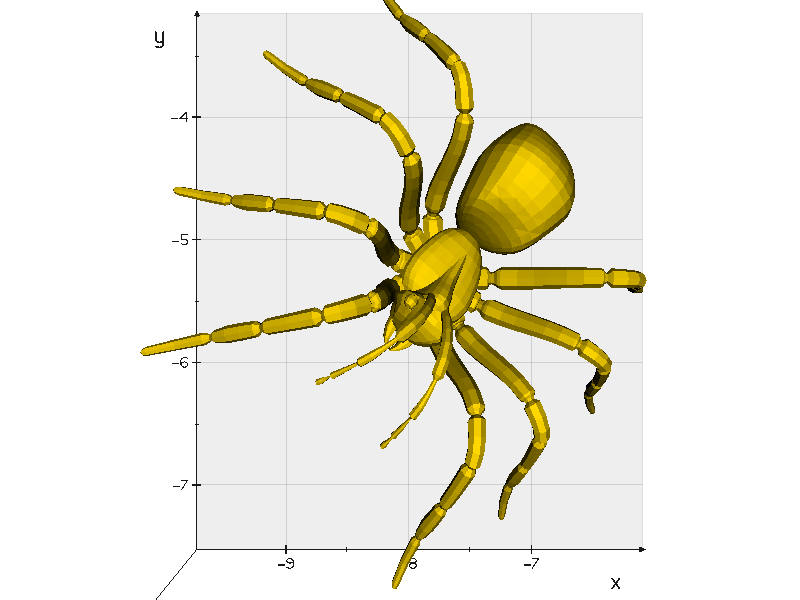

In [102]:
import numpy as np
from vedo import Mesh, show

# Center of mass (from your data)
com_x, com_y, com_z = 6.40, 1.52, 1.57

# Define rotation angles in radians
theta_x, theta_y, theta_z = np.radians([10, 20, 30])  # Rotation angles

# Define the rotation matrices for each axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta_x), -np.sin(theta_x)],
               [0, np.sin(theta_x), np.cos(theta_x)]])
Ry = np.array([[np.cos(theta_y), 0, np.sin(theta_y)],
               [0, 1, 0],
               [-np.sin(theta_y), 0, np.cos(theta_y)]])
Rz = np.array([[np.cos(theta_z), -np.sin(theta_z), 0],
               [np.sin(theta_z), np.cos(theta_z), 0],
               [0, 0, 1]])

# Combined rotation matrix
R = Rz @ Ry @ Rx

# Scaling factors
sx, sy, sz = 1.1, 1.2, 1.3  

# Scaling matrix
S = np.array([[sx, 0, 0],
              [0, sy, 0],
              [0, 0, sz]])

# Get mesh vertices as a numpy array
vertices = np.array(spider_mesh.points())

# Translate mesh to center it at the origin
vertices -= np.array([com_x, com_y, com_z])

# Apply rotation and scaling
transformed_vertices = (R @ vertices.T).T 
transformed_vertices = (S @ transformed_vertices.T).T 

# Update the mesh with transformed vertices
spider_mesh.points(transformed_vertices)

# Display the result
show(spider_mesh, axes=True)